# Kakuma Water Sanitation Data Analytics Capstone Project

## Part 1. Data Cleaning

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df= pd.read_csv('kakuma_water_sanitation.csv')

df.head()

,Household_ID,Zone,Water_Source,Distance_km,Collection_Times_Daily,Liters_Per_Person_Per_Day,Household_Size,Sanitation_Status
0,WH0001,Kakuma 4,River,0.50,2.0,10.0,2.0,Adequate
1,WH0002,Kalobeyei,River,0.35,4.0,22.0,8.0,Poor
2,WH0003,NaN,River,NaN,3.0,10.0,NaN,Moderate
3,WH0004,Kalobeyei,River,1.80,4.0,8.0,2.0,Poor
4,WH0005,Kalobeyei,River,NaN,NaN,16.0,9.0,Poor


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Household_ID               1000 non-null   object 
 1   Zone                       900 non-null    object 
 2   Water_Source               900 non-null    object 
 3   Distance_km                900 non-null    float64
 4   Collection_Times_Daily     900 non-null    float64
 5   Liters_Per_Person_Per_Day  900 non-null    float64
 6   Household_Size             900 non-null    float64
 7   Sanitation_Status          900 non-null    object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


 ## Step 1: Initial Data Overview

In [22]:
df.isnull().sum()


Household_ID                   0
Zone                         100
Water_Source                 100
Distance_km                  100
Collection_Times_Daily       100
Liters_Per_Person_Per_Day    100
Household_Size               100
Sanitation_Status            100
dtype: int64

In [23]:
df['Water_Source'] = df['Water_Source'].ffill()
df['Sanitation_Status'] = df['Sanitation_Status'].ffill()




In [24]:
df.isnull().sum()


Household_ID                   0
Zone                         100
Water_Source                   0
Distance_km                  100
Collection_Times_Daily       100
Liters_Per_Person_Per_Day    100
Household_Size               100
Sanitation_Status              0
dtype: int64

# Fill missing numerical values with median

In [25]:
df['Distance_km'] = df['Distance_km'].fillna(df['Distance_km'].median())
df['Liters_Per_Person_Per_Day'] = df['Liters_Per_Person_Per_Day'].fillna(df['Liters_Per_Person_Per_Day'].median())
df['Household_Size'] = df['Household_Size'].fillna(df['Household_Size'].median())


In [26]:
df.isnull().sum()

Household_ID                   0
Zone                         100
Water_Source                   0
Distance_km                    0
Collection_Times_Daily       100
Liters_Per_Person_Per_Day      0
Household_Size                 0
Sanitation_Status              0
dtype: int64

In [27]:
df['Zone'] = df['Zone'].ffill()
df['Collection_Times_Daily'] = df['Collection_Times_Daily'].ffill()


In [28]:
df.isnull().sum()

Household_ID                 0
Zone                         0
Water_Source                 0
Distance_km                  0
Collection_Times_Daily       0
Liters_Per_Person_Per_Day    0
Household_Size               0
Sanitation_Status            0
dtype: int64

## Part 2. Data Transformation

 # Data Type Consistency

In [29]:
df['Distance_km'] = pd.to_numeric(df['Distance_km'], errors='coerce')
df['Liters_Per_Person_Per_Day'] = pd.to_numeric(df['Liters_Per_Person_Per_Day'], errors='coerce')
df['Household_Size'] = pd.to_numeric(df['Household_Size'], errors='coerce')

# Standardize Text Columns

In [30]:
text_cols = ['Zone', 'Water_Source', 'Sanitation_Status']
df[text_cols] = df[text_cols].apply(lambda col: col.str.strip().str.lower())

df[text_cols].head()


,Zone,Water_Source,Sanitation_Status
0,kakuma 4,river,adequate
1,kalobeyei,river,poor
2,kalobeyei,river,moderate
3,kalobeyei,river,poor
4,kalobeyei,river,poor


## Create Distance Bins

In [31]:
def distance_bin(d):
    if d <= 0.5:
        return '0–0.5 km'
    elif d <= 1.0:
        return '0.5–1 km'
    else:
        return '>1 km'

df['Distance_Bin'] = df['Distance_km'].apply(distance_bin)

df['Distance_Bin'].head(5)

0    0–0.5 km
1    0–0.5 km
2       >1 km
3       >1 km
4       >1 km
Name: Distance_Bin, dtype: object

### Calculate Total Water Per Household

In [32]:
df['Total_Liters_Per_Household'] = df['Liters_Per_Person_Per_Day'] * df['Household_Size']

df['Total_Liters_Per_Household'].head()

0     20.0
1    176.0
2     60.0
3     16.0
4    144.0
Name: Total_Liters_Per_Household, dtype: float64

 ## Identify Sufficiency

In [33]:
df['Meets_Water_Standard'] = df['Liters_Per_Person_Per_Day'] >= 20

df['Meets_Water_Standard'].head() 



0    False
1     True
2    False
3    False
4    False
Name: Meets_Water_Standard, dtype: bool

# Group Summary 

In [55]:
zone_summary = df.groupby('Zone').agg({
    'Distance_km': 'mean',
    'Liters_Per_Person_Per_Day': 'mean',
    'Meets_Water_Standard': 'mean',
    'Sanitation_Status': lambda x: x.value_counts().index[0],  # mode
}).reset_index()

zone_summary

,Zone,Distance_km,Liters_Per_Person_Per_Day,Meets_Water_Standard,Sanitation_Status
0,kakuma 1,1.315347,15.009901,0.267327,poor
1,kakuma 2,1.292214,14.686567,0.213930,poor
2,kakuma 3,1.306774,14.860215,0.263441,moderate
3,kakuma 4,1.247574,14.965347,0.257426,adequate
4,kalobeyei,1.342512,14.416268,0.210526,poor


 ## Export Cleaned Data

In [35]:
df.to_csv('kakuma_cleaned.csv', index=False)
print("\n✅ Cleaned dataset saved as 'kakuma_cleaned.csv'")


✅ Cleaned dataset saved as 'kakuma_cleaned.csv'


 # 1. Sanitation Conditions by Zone

# Part 3.Data insights

## Sanitation Status count per Zone

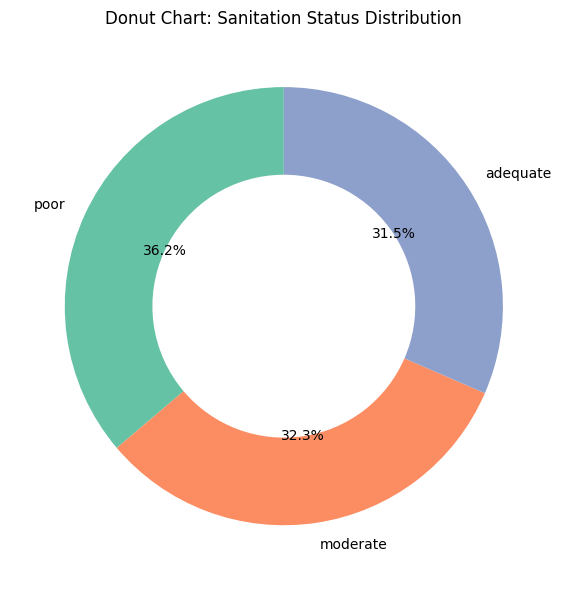

In [69]:
sanitation_by_zone = df.groupby('Zone')['Sanitation_Status'].value_counts().unstack().fillna(0)

# Count sanitation status across the entire dataset
status_counts = df['Sanitation_Status'].value_counts()

# Set colors
colors = sns.color_palette("Set2")

# Create donut chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops={'width': 0.4})
plt.title("Donut Chart: Sanitation Status Distribution")
plt.tight_layout()
plt.savefig("donut_chart_sanitation_status.png")
plt.show()



### Look for zones with high “open defecation” or “poor” sanitation status.

# 2. Average Water Collection Distance

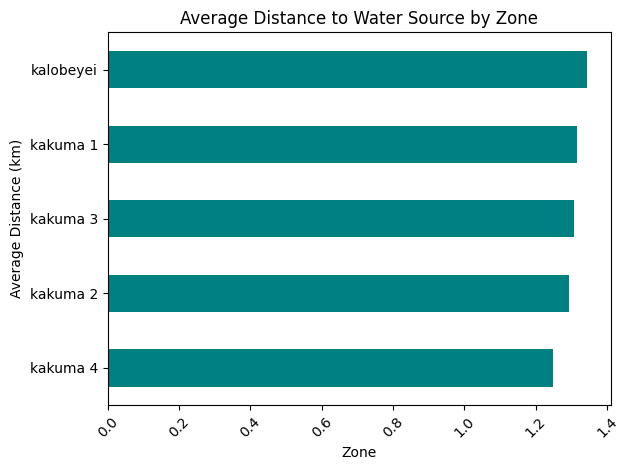


Overall average distance to collect water: 1.30 km


In [70]:
# Average Distance per Zone
avg_distance = df.groupby('Zone')['Distance_km'].mean().sort_values(ascending=False)

# Chart Type: Bar Chart
avg_distance = df.groupby('Zone')['Distance_km'].mean().sort_values()
avg_distance.plot(kind='barh', color='teal')
plt.title('Average Distance to Water Source by Zone')
plt.ylabel('Average Distance (km)')
plt.xlabel('Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 
# Overall average
overall_avg_distance = df['Distance_km'].mean()
print(f"\nOverall average distance to collect water: {overall_avg_distance:.2f} km")


### Zones with average distances > 1 km may be facing access challenges.

# 3. Water Sufficiency Assessment (20 liters standard)


% of households meeting 20L/person/day: 24.20%


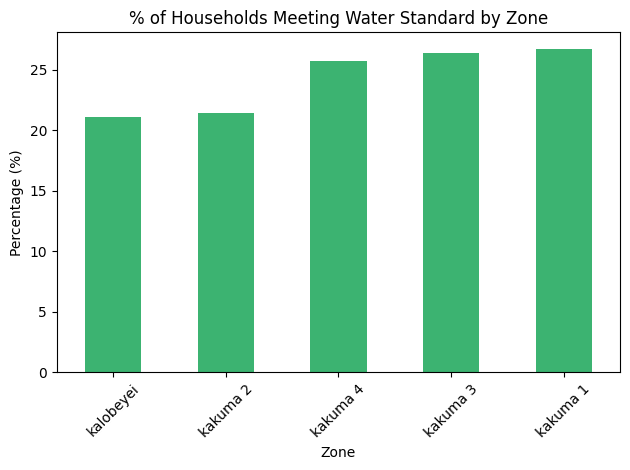

In [44]:
# Create sufficiency column if not already done
df['Meets_Water_Standard'] = df['Liters_Per_Person_Per_Day'] >= 20

# Proportion meeting the standard
sufficiency_rate = df['Meets_Water_Standard'].mean() * 100
print(f"\n% of households meeting 20L/person/day: {sufficiency_rate:.2f}%")

# Column Chart: % meeting water standard by zone
meets_by_zone = df[df['Meets_Water_Standard'] == True].groupby('Zone')['Household_ID'].count()
total_by_zone = df.groupby('Zone')['Household_ID'].count()
percent_meeting = (meets_by_zone / total_by_zone * 100).sort_values()

percent_meeting.plot(kind='bar', color='mediumseagreen')
plt.title('% of Households Meeting Water Standard by Zone')
plt.ylabel('Percentage (%)')
plt.xlabel('Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






Water Sufficiency by Zone (%):
 Zone
kakuma 1     26.732673
kakuma 2     21.393035
kakuma 3     26.344086
kakuma 4     25.742574
kalobeyei    21.052632
Name: Meets_Water_Standard, dtype: float64


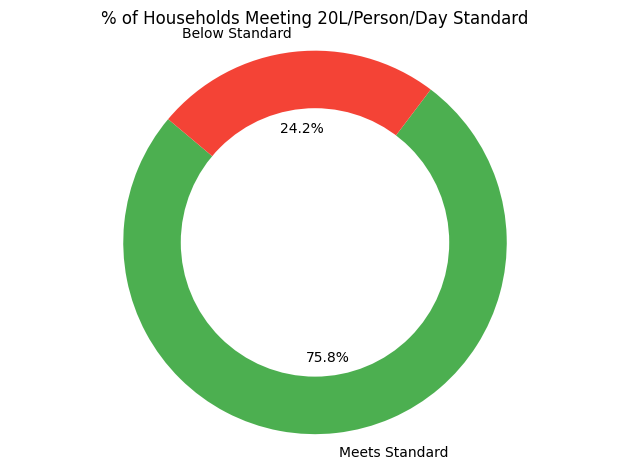

In [45]:
# By Zone
sufficiency_by_zone = df.groupby('Zone')['Meets_Water_Standard'].mean() * 100
print("\nWater Sufficiency by Zone (%):\n", sufficiency_by_zone)


# Chart Type: Donut Chart + Column Chart
sufficiency_counts = df['Meets_Water_Standard'].value_counts()
plt.pie(sufficiency_counts, labels=['Meets Standard', 'Below Standard'], autopct='%1.1f%%', startangle=140, colors=['#4caf50', '#f44336'])
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('% of Households Meeting 20L/Person/Day Standard')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 4. Water Source Reliance and Efficiency

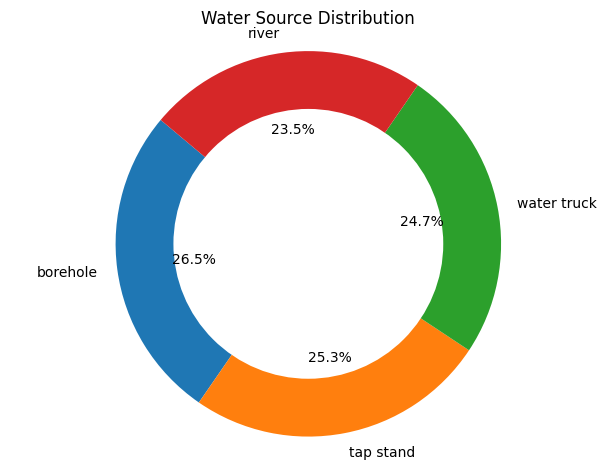

,Liters_Per_Person_Per_Day,Collection_Times_Daily
Water_Source,,
tap stand,15.304348,2.541502
river,15.153191,2.540426
water truck,14.433198,2.457490
borehole,14.286792,2.467925


In [ ]:
# Water source distribution overall
water_source_dist = df['Water_Source'].value_counts()


# Chart Type: Donut + Pie

plt.pie(water_source_dist, labels=water_source_dist.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Water Source Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Efficiency: Average liters per water source
efficiency = df.groupby('Water_Source').agg({
    'Liters_Per_Person_Per_Day': 'mean',
    'Collection_Times_Daily': 'mean'
}).sort_values(by='Liters_Per_Person_Per_Day', ascending=False)



# 5. Water Access vs Sanitation (Correlation )

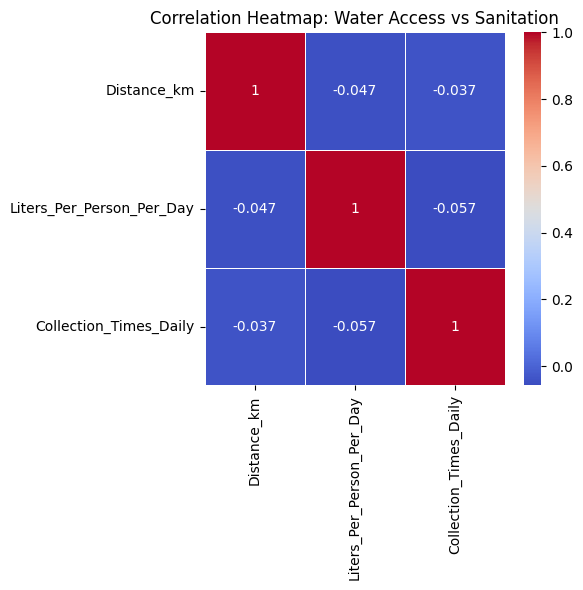

In [49]:
# Correlation matrix
correlation_matrix = df[['Distance_km', 'Liters_Per_Person_Per_Day', 'Collection_Times_Daily']].corr()
# Chart Type: Heatmap
# Only numerical values considered for correlation

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Water Access vs Sanitation')
plt.tight_layout()
plt.show()


# To check if better water access correlates with better sanitation:


In [67]:
# Encode sanitation condition (example mapping)
sanitation_mapping = {
    'poor': 0,
    'moderate': 1,
    'adequate': 2,
    'unknown': np.nan
}
df['Sanitation_Score'] = df['Sanitation_Status'].map(sanitation_mapping)


Correlation with Sanitation Score:
                            Distance_km  Liters_Per_Person_Per_Day  \
Distance_km                   1.000000                  -0.046915   
Liters_Per_Person_Per_Day    -0.046915                   1.000000   
Sanitation_Score             -0.003103                  -0.016313   

                           Sanitation_Score  
Distance_km                       -0.003103  
Liters_Per_Person_Per_Day         -0.016313  
Sanitation_Score                   1.000000  


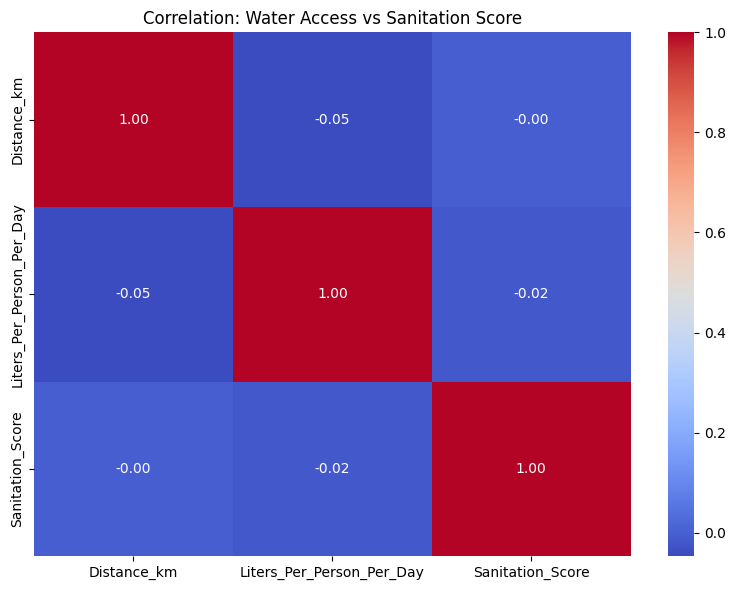

In [68]:
# Correlation with sanitation score
correlation_with_sanitation = df[['Distance_km', 'Liters_Per_Person_Per_Day', 'Sanitation_Score']].corr()
print("Correlation with Sanitation Score:\n", correlation_with_sanitation)

# Heatmap for visual analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_sanitation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Water Access vs Sanitation Score")
plt.tight_layout()
plt.savefig("heatmap_access_vs_sanitation.png")
plt.show()

### Negative correlation between Distance_km and Sanitation_Score may indicate that closer water access is linked to better sanitation.